In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.axes as ax
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('Downloads/us_births_2016_2021.csv')

#replacing all values below 0 with 0
df = df.replace(to_replace=-1, value=0)

In [3]:
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [4]:
#how many rows their in the data
len(df)

5496

In [5]:
#Arranging to see what state there is in the data
ef = df.groupby('State')
ef.count()

,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
State,,,,,,,,
Alabama,108,108,108,108,108,108,108,108
Alaska,108,108,108,108,108,108,108,108
Arizona,108,108,108,108,108,108,108,108
Arkansas,108,108,108,108,108,108,108,108
California,108,108,108,108,108,108,108,108
Colorado,108,108,108,108,108,108,108,108
Connecticut,108,108,108,108,108,108,108,108
Delaware,108,108,108,108,108,108,108,108
District of Columbia,108,108,108,108,108,108,108,108


In [6]:
#Finding out the index of the data
df.keys()

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

In [7]:
df.index

RangeIndex(start=0, stop=5496, step=1)

In [8]:
#priting the datatype of each columns to see what they mean
print(df.dtypes)

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object


In [9]:
#Filtering the data for the year 2016
df_2016 = df[df['Year'] == 2016]

print(df_2016)

        State State Abbreviation  Year Gender  \
0     Alabama                 AL  2016      F   
1     Alabama                 AL  2016      F   
2     Alabama                 AL  2016      F   
3     Alabama                 AL  2016      F   
4     Alabama                 AL  2016      F   
...       ...                ...   ...    ...   
5401  Wyoming                 WY  2016      M   
5402  Wyoming                 WY  2016      M   
5403  Wyoming                 WY  2016      M   
5404  Wyoming                 WY  2016      M   
5405  Wyoming                 WY  2016      M   

                              Education Level of Mother  Education Level Code  \
0                                     8th grade or less                     1   
1                9th through 12th grade with no diploma                     2   
2                 High school graduate or GED completed                     3   
3                 Some college credit, but not a degree                     4   
4     

In [10]:
df = df[df['Education Level Code'] >= 0]

/var/folders/_v/cr1bxcv119vb9x9pjzrzr62m0000gp/T/ipykernel_43009/3315152366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level Code'] = df['Education Level Code'].astype(float)


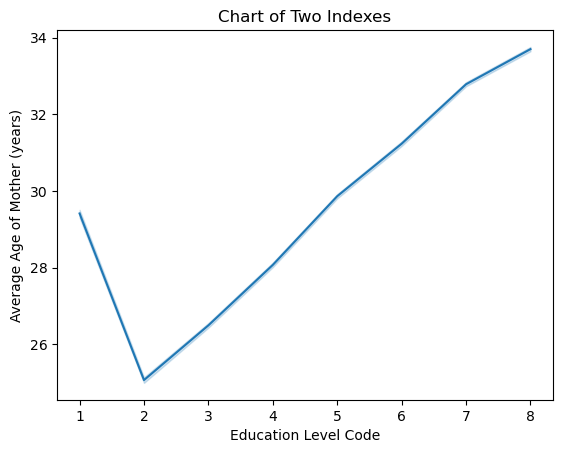

In [11]:
# Convert the Education Level Code column to type float
df['Education Level Code'] = df['Education Level Code'].astype(float)

# Select the two indexes
index1 = df['Education Level Code']
index2 = df['Average Age of Mother (years)']

# Create the chart
fig, ax = plt.subplots()
sns.lineplot(x=index1, y=index2, ax=ax)

# Set the title and labels
ax.set_title("Chart of Two Indexes")
ax.set_xlabel("Education Level Code")
ax.set_ylabel("Average Age of Mother (years)")

plt.show()

In [12]:
#groupping the data for 2016 and finding a mean
df_2016.groupby('State Abbreviation')['Number of Births'].mean()

State Abbreviation
AK      622.722222
AL     3286.166667
AR     2126.333333
AZ     4695.555556
CA    27157.055556
CO     3700.722222
CT     2000.833333
DC      547.666667
DE      610.666667
FL    12501.222222
GA     7224.555556
HI     1003.277778
IA     2189.055556
ID     1249.000000
IL     8580.277778
IN     4616.166667
KS     2114.055556
KY     3080.500000
LA     3509.888889
MA     3962.055556
MD     4063.111111
ME      746.941176
MI     6295.277778
MN     3874.944444
MO     4150.277778
MS     2107.111111
MT      682.333333
NC     6709.944444
ND      632.388889
NE     1660.875000
NH      681.500000
NJ     5702.611111
NM     1371.777778
NV     2014.444444
NY    13015.722222
OH     7671.388889
OK     2921.777778
OR     2529.722222
PA     7744.944444
RI      599.888889
SC     3185.666667
SD      681.944444
TN     4489.277778
TX    22113.722222
UT     2803.555556
VA     5692.222222
VT      319.777778
WA     5028.055556
WI     3700.833333
WV     1059.944444
WY      410.333333
Name: Number

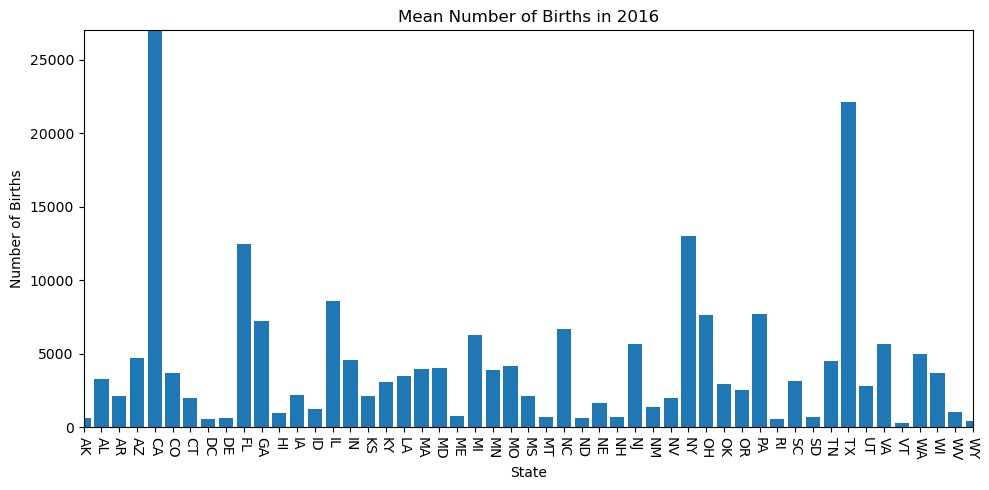

In [13]:
# Get the mean number of births in each state
mean_births = df_2016.groupby('State Abbreviation')['Number of Births'].mean()

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 5))

# Create a bar graph
ax.bar(mean_births.index, mean_births)

# Increase the axis
ax.set_xlim([0, 50])
ax.set_ylim([0, 27000])

# Add a title and labels
ax.set_title('Mean Number of Births in 2016')
ax.set_xlabel('State')
ax.set_ylabel('Number of Births')

# Rotate the x-axis ticks
ax.xaxis.set_ticks_position('bottom')
ax.xaxis.set_tick_params(rotation=-90)

# Tighten the layout
plt.tight_layout()

# Show the graph
plt.show()

In [14]:
df_2016.groupby('Average Age of Mother (years)')['Number of Births'].mean()

Average Age of Mother (years)
23.2    1742.500000
23.3    1330.333333
23.4     340.000000
23.5     389.000000
23.6     439.000000
           ...     
34.6    7042.000000
34.7    6741.000000
34.8     112.000000
34.9     553.000000
35.0     512.000000
Name: Number of Births, Length: 118, dtype: float64

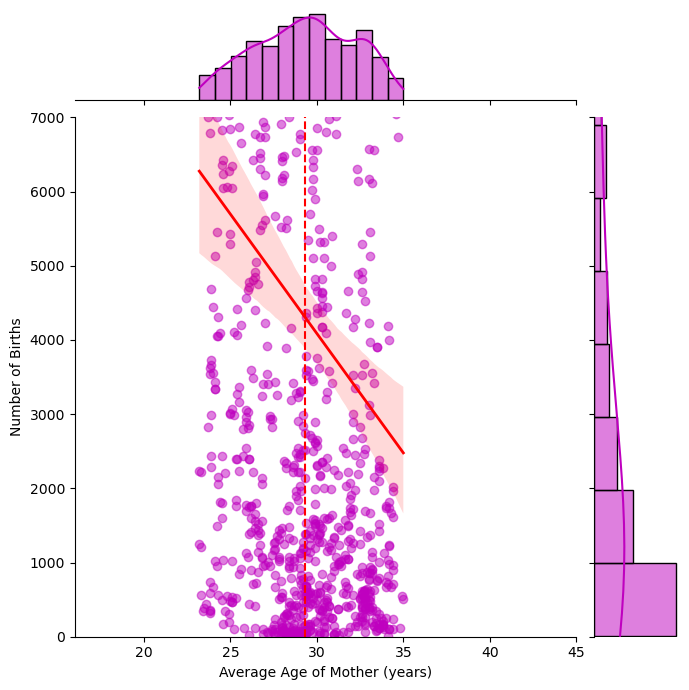

In [15]:
# Load the data
df = pd.read_csv('Downloads/us_births_2016_2021.csv')

# Filter the data for 2016
df_2016 = df[df['Year'] == 2016]

# Calculate the mean age of mother
mean_age_of_mother = df_2016['Average Age of Mother (years)'].mean()

# Create the joint plot
g = sns.jointplot(x='Average Age of Mother (years)', y='Number of Births', data=df_2016, kind="reg",
                    xlim=(16, 45), ylim=(0, 7000), color="m", height=7,
                    line_kws={"color": "red", "lw": 2},
                    scatter_kws={"alpha": 0.5})

# Add the mean line
g.ax_joint.axvline(mean_age_of_mother, color="red", linestyle="--")

# Show the plot
plt.show()

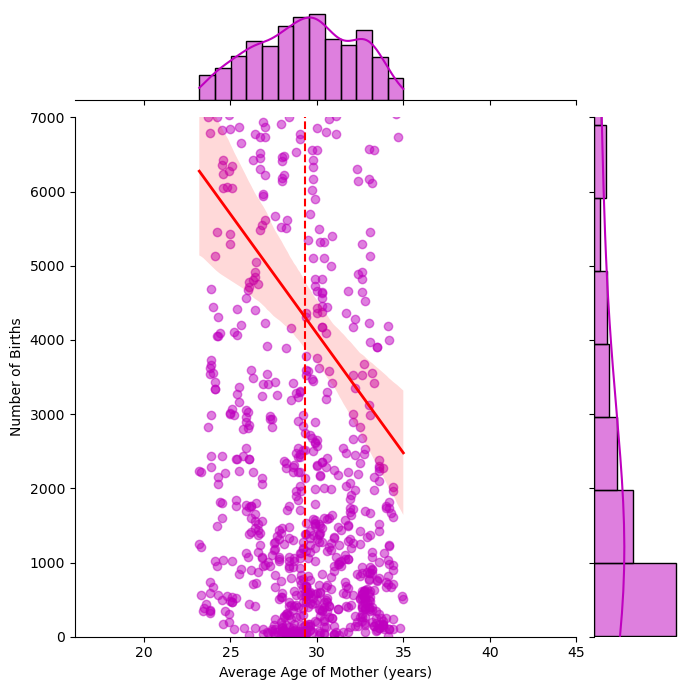

In [16]:
# Load the data
df = pd.read_csv('Downloads/us_births_2016_2021.csv')

# Filter the data for 2016
df_2016 = df[df['Year'] == 2016]

# Calculate the mean age of mother
mean_age_of_mother = df_2016['Average Age of Mother (years)'].mean()

# Create the joint plot
g = sns.jointplot(x='Average Age of Mother (years)', y='Number of Births', data=df_2016, kind="reg",
                    xlim=(16, 45), ylim=(0, 7000), color="m", height=7,
                    line_kws={"color": "red", "lw": 2},
                    scatter_kws={"alpha": 0.5})

# Add the mean line
g.ax_joint.axvline(mean_age_of_mother, color="red", linestyle="--")

# Show the plot
plt.show()

In [17]:
#Specify numeric_only=True
df_2016 = df[df['Year'] == 2016]
df_2016.mean(numeric_only=True)

Year                             2016.000000
Education Level Code                3.039344
Number of Births                 4312.407650
Average Age of Mother (years)      29.300874
Average Birth Weight (g)         3261.675191
dtype: float64

In [18]:
df_2017 = df[df['Year'] == 2017]
df_2017.mean(numeric_only=True)

Year                             2017.000000
Education Level Code                3.039344
Number of Births                 4213.638251
Average Age of Mother (years)      29.402951
Average Birth Weight (g)         3255.959016
dtype: float64

In [19]:
df_2018 = df[df['Year'] == 2018]
df_2018.mean(numeric_only=True)

Year                             2018.000000
Education Level Code                3.013086
Number of Births                 4134.904035
Average Age of Mother (years)      29.533043
Average Birth Weight (g)         3253.897056
dtype: float64

In [20]:
df_2019 = df[df['Year'] == 2019]
df_2019.mean(numeric_only=True)

Year                             2019.000000
Education Level Code                3.013086
Number of Births                 4086.729553
Average Age of Mother (years)      29.602726
Average Birth Weight (g)         3247.985060
dtype: float64

In [21]:
df_2020 = df[df['Year'] == 2020]
df_2020.mean(numeric_only=True)

Year                             2020.000000
Education Level Code                3.026201
Number of Births                 3945.014192
Average Age of Mother (years)      29.699127
Average Birth Weight (g)         3246.677838
dtype: float64

In [22]:
df_2021 = df[df['Year'] == 2021]
df_2021.mean(numeric_only=True)

Year                             2021.000000
Education Level Code                3.026201
Number of Births                 4000.302402
Average Age of Mother (years)      29.774454
Average Birth Weight (g)         3239.148799
dtype: float64

In [23]:
df = pd.read_csv('Downloads/us_births_2016_2021.csv')

df_2017 = df[df['Year'] == 2017]

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 18 to 5423
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          915 non-null    object 
 1   State Abbreviation             915 non-null    object 
 2   Year                           915 non-null    int64  
 3   Gender                         915 non-null    object 
 4   Education Level of Mother      915 non-null    object 
 5   Education Level Code           915 non-null    int64  
 6   Number of Births               915 non-null    int64  
 7   Average Age of Mother (years)  915 non-null    float64
 8   Average Birth Weight (g)       915 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 71.5+ KB


In [24]:
df_2017.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
18,Alabama,AL,2017,F,8th grade or less,1,1012,27.6,3139.6
19,Alabama,AL,2017,F,9th through 12th grade with no diploma,2,3283,24.4,3040.6
20,Alabama,AL,2017,F,High school graduate or GED completed,3,8962,25.4,3068.8
21,Alabama,AL,2017,F,"Some college credit, but not a degree",4,6384,26.9,3112.3
22,Alabama,AL,2017,F,"Associate degree (AA, AS)",5,2411,28.9,3197.2


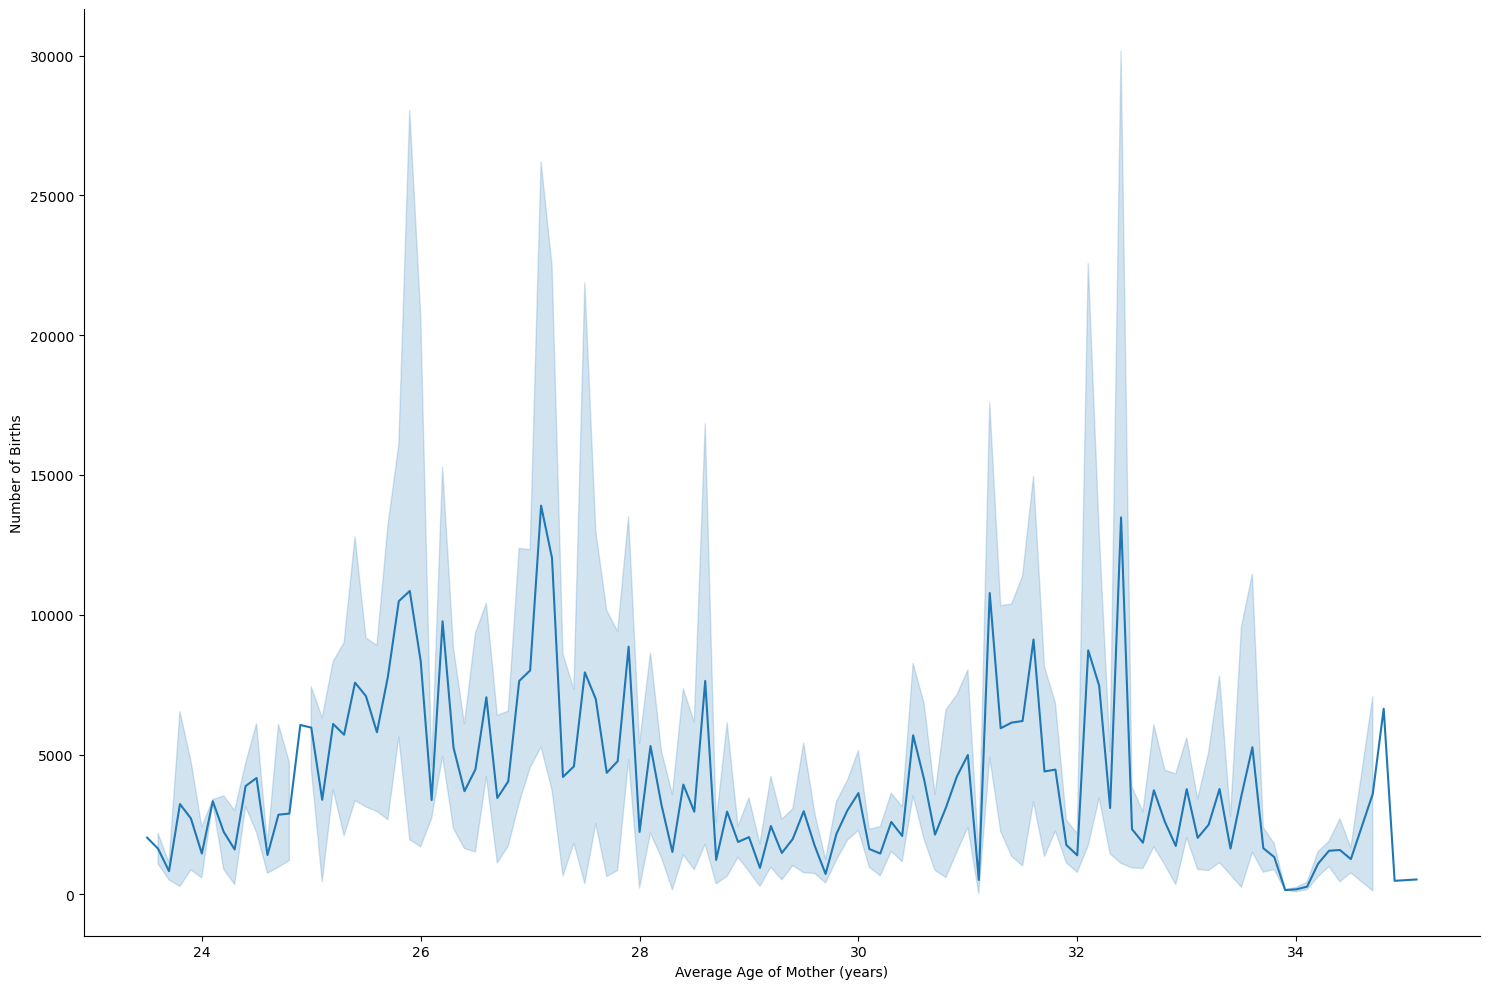

In [25]:
df = pd.read_csv('Downloads/us_births_2016_2021.csv')

df_2017 = df[df['Year'] == 2017]

# Plot the lines on two facets
sns.relplot(
    data=df_2017,
    x="Average Age of Mother (years)", y="Number of Births",
    kind="line", size_order=["1", "2"],
    height=10, aspect=1.5)

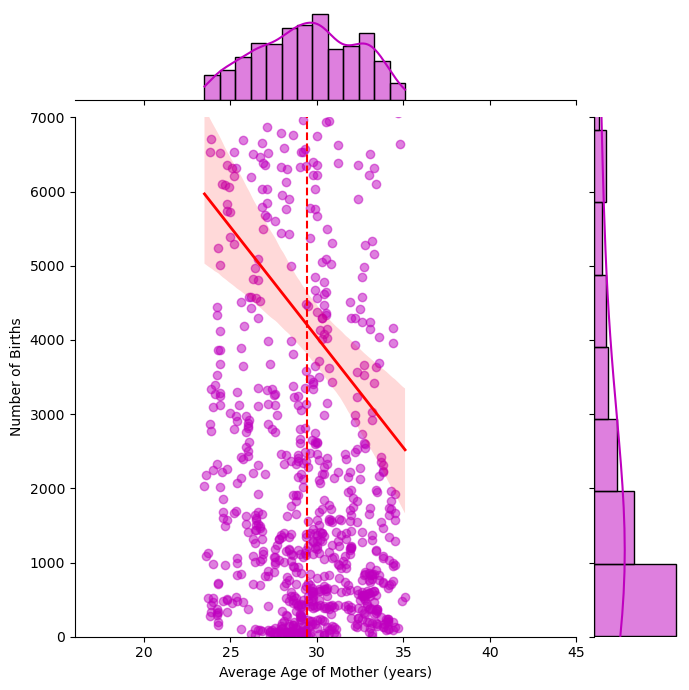

In [26]:
# Load the data
df = pd.read_csv('Downloads/us_births_2016_2021.csv')

# Filter the data for 2016
df_2016 = df[df['Year'] == 2017]

# Calculate the mean age of mother
mean_age_of_mother = df_2016['Average Age of Mother (years)'].mean()

# Create the joint plot
g = sns.jointplot(x='Average Age of Mother (years)', y='Number of Births', data=df_2016, kind="reg",
                    xlim=(16, 45), ylim=(0, 7000), color="m", height=7,
                    line_kws={"color": "red", "lw": 2},
                    scatter_kws={"alpha": 0.5})

# Add the mean line
g.ax_joint.axvline(mean_age_of_mother, color="red", linestyle="--")

# Show the plot
plt.show()

The mean number of births in 2017 was 4213.63825136612.
The mean number of births in 2016 was 4213.63825136612.


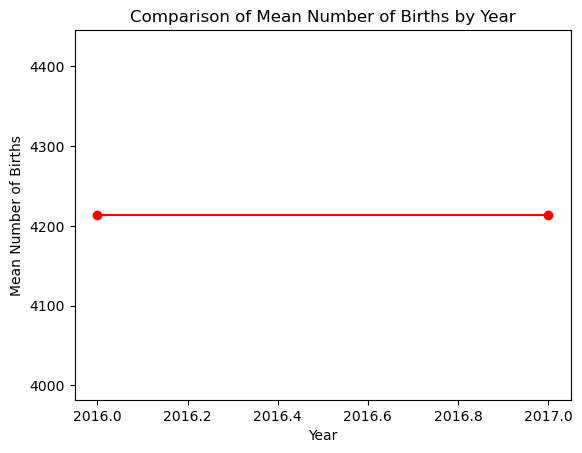

In [34]:
# Calculate the mean of df_2017
mean_2017 = df_2017['Number of Births'].mean()

# Calculate the mean of df_2016
mean_2016 = df_2016['Number of Births'].mean()

# Compare the means
print('The mean number of births in 2017 was {}.'.format(mean_2017))
print('The mean number of births in 2016 was {}.'.format(mean_2016))

# Compare the means visually
plt.plot([2016, 2017], [mean_2016, mean_2017], 'ro-')
plt.xlabel('Year')
plt.ylabel('Mean Number of Births')
plt.title('Comparison of Mean Number of Births by Year')
plt.show()

In [28]:
df_all = pd.DataFrame({
'Year': [2016, 2017, 2018, 2019, 2020, 2021],
'Education Level Code': [3.039344, 3.039344, 3.013086, 3.013086, 3.026201, 3.026201],
'Number of Births': [4312.407650, 4213.638251, 4134.904035, 4086.729553, 3945.014192, 4000.302402],
'Average Age of Mother (years)': [29.300874, 29.402951, 29.533043, 29.602726, 29.699127, 29.774454],
'Average Birth Weight (g)': [3261.675191, 3255.959016, 3253.897056, 3247.985060, 3246.677838, 3239.148799]
})

#This code creates a new column named `New Column` and assigns it the value
df['New Column'] = 'Prego Mean'

#This code encodes the new column 'Prego Mean' using the astype()
df['New Column'] = df['New Column'].astype('category').cat.codes

print(df_all)

   Year  Education Level Code  Number of Births  \
0  2016              3.039344       4312.407650   
1  2017              3.039344       4213.638251   
2  2018              3.013086       4134.904035   
3  2019              3.013086       4086.729553   
4  2020              3.026201       3945.014192   
5  2021              3.026201       4000.302402   

   Average Age of Mother (years)  Average Birth Weight (g)  
0                      29.300874               3261.675191  
1                      29.402951               3255.959016  
2                      29.533043               3253.897056  
3                      29.602726               3247.985060  
4                      29.699127               3246.677838  
5                      29.774454               3239.148799  


In [29]:
from sklearn.preprocessing import LabelEncoder

df_all = df_all.assign(New_Column='Prego Mean')

le = LabelEncoder()

le.fit(df_all['New_Column'])

df_all['Encoded_New_Column'] = le.transform(df_all['New_Column'])

print(df_all)

   Year  Education Level Code  Number of Births  \
0  2016              3.039344       4312.407650   
1  2017              3.039344       4213.638251   
2  2018              3.013086       4134.904035   
3  2019              3.013086       4086.729553   
4  2020              3.026201       3945.014192   
5  2021              3.026201       4000.302402   

   Average Age of Mother (years)  Average Birth Weight (g)  New_Column  \
0                      29.300874               3261.675191  Prego Mean   
1                      29.402951               3255.959016  Prego Mean   
2                      29.533043               3253.897056  Prego Mean   
3                      29.602726               3247.985060  Prego Mean   
4                      29.699127               3246.677838  Prego Mean   
5                      29.774454               3239.148799  Prego Mean   

   Encoded_New_Column  
0                   0  
1                   0  
2                   0  
3                   0  
4  

In [30]:
df['Encoded_New_Column'] = df['New Column']

In [35]:
df_all = df_all.assign(New_Column='Prego Mean')

le = LabelEncoder()

le.fit(df_all['New_Column'])

df_all['Encoded_New_Column'] = le.transform(df_all['New_Column'])

print(df_all)

#Remove the new coloumn column
df_all = df_all.drop('New_Column', axis=1)

#fit the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
model.fit(df_all['Encoded_New_Column'], df_all['Encoded_New_Column'], epochs=10)

#Evalaute the NN
loss, accuracy = model.evaluate(df_all['Encoded_New_Column'], df_all['Encoded_New_Column'])
print('Loss:', loss)
print('Accuracy:', accuracy)

   Year  Education Level Code  Number of Births  \
0  2016              3.039344       4312.407650   
1  2017              3.039344       4213.638251   
2  2018              3.013086       4134.904035   
3  2019              3.013086       4086.729553   
4  2020              3.026201       3945.014192   
5  2021              3.026201       4000.302402   

   Average Age of Mother (years)  Average Birth Weight (g)  New_Column  \
0                      29.300874               3261.675191  Prego Mean   
1                      29.402951               3255.959016  Prego Mean   
2                      29.533043               3253.897056  Prego Mean   
3                      29.602726               3247.985060  Prego Mean   
4                      29.699127               3246.677838  Prego Mean   
5                      29.774454               3239.148799  Prego Mean   

   Encoded_New_Column  
0                   0  
1                   0  
2                   0  
3                   0  
4  

2023-06-12 17:54:01.542435: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1/1 [==============================] - 1s 581ms/step - loss: 0.2500 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2495 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2490 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2485 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.2483 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2480 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 161ms/step - loss: 0.2475 - accuracy: 1.0000
Loss: 0.24750669300556183
Accuracy: